In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Datasets/avocado-prices/avocado.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

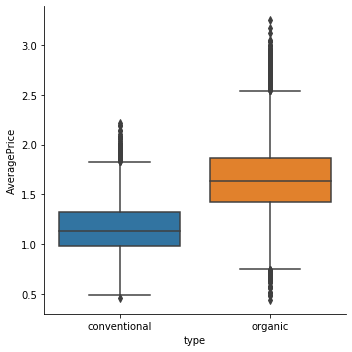

In [7]:
sns.catplot(x = 'type', y = 'AveragePrice', data=df, kind='box')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [9]:
df['AveragePrice'] = df['AveragePrice'].astype('int')
df['Total Volume'] = df['Total Volume'].astype('int')
df['4046'] = df['4046'].astype('int')
df['4225'] = df['4225'].astype('int')
df['4770'] = df['4770'].astype('int')
df['Total Bags'] = df['Total Bags'].astype('int')
df['Small Bags'] = df['Small Bags'].astype('int')
df['Large Bags'] = df['Large Bags'].astype('int')
df['XLarge Bags'] = df['XLarge Bags'].astype('int')

In [10]:
col_type = {'conventional': 0, 'organic': 1}
df['type'] = df['type'].map(col_type)

In [11]:
col_region = df['region'].unique()

In [12]:
list_region = list(range(0, len(df['region'].unique())))
col_region = dict(zip(col_region, list_region))
df['region'] = df['region'].map(col_region)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  int64         
 2   Total Volume  18249 non-null  int64         
 3   4046          18249 non-null  int64         
 4   4225          18249 non-null  int64         
 5   4770          18249 non-null  int64         
 6   Total Bags    18249 non-null  int64         
 7   Small Bags    18249 non-null  int64         
 8   Large Bags    18249 non-null  int64         
 9   XLarge Bags   18249 non-null  int64         
 10  type          18249 non-null  int64         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 1.8 MB


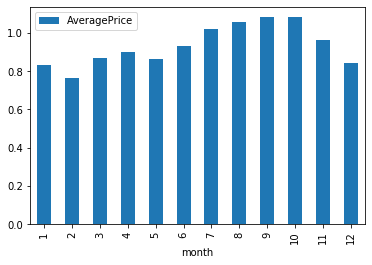

In [14]:
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.groupby('month').mean().reset_index().plot(y='AveragePrice', x='month', kind='bar')

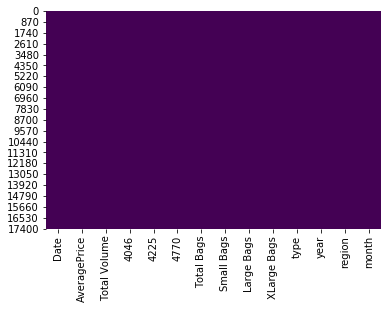

In [15]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
X = df.drop(labels=['region', 'type', 'Date'], axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [18]:
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [19]:
model.score(X_train, y_train)

0.9304061922049456

In [20]:
model.score(X_test, y_test)

0.941917808219178

In [21]:
from xgboost import XGBClassifier

In [22]:
from sklearn.feature_selection import RFE

In [23]:
W = df.drop(labels=['region', 'type', 'Date'], axis=1)
u = df['region']

X_train, X_test, y_train, y_test = train_test_split(W, u, test_size=0.2, random_state=50)

In [24]:
model = XGBClassifier(random_state=50)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(W, u)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [25]:
rfe.support_

array([False,  True,  True,  True,  True, False, False,  True, False,
       False, False])

In [26]:
xx = W[W.columns[rfe.support_]]
xx.head()

,Total Volume,4046,4225,4770,Large Bags
0,64236,1036,54454,48,93
1,54876,674,44638,58,97
2,118220,794,109149,130,103
3,78992,1132,71976,72,133
4,51039,941,43838,75,197


In [27]:
X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.2, random_state=8, stratify = y)

In [28]:
model = XGBClassifier(random_state=50)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [29]:
model.score(X_train, y_train)

0.9754092746078499

In [30]:
model.score(X_test, y_test)

0.9745205479452055

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [32]:
y_predict_prob = model.predict_proba(X_test)[:, 1]

In [33]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [34]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('Log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.9745205479452055
Log loss:  0.07802499479524894
auc:  0.996220829423907


In [ ]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i, index in enumerate(corrdata.index):
        if  abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data=value, index = feature, columns=['Corr Value'])
    return df 